# Assignment 2 - Machine learning and modeling
In this assignment, you work in the same groups you already are divided into. You need to define at least one task based on each of the exercises 4, 5 and 10. All together three tasks. You have to apply the tasks on the same dataset that you used in Assignment 1. 

You will hand in the assignment through a Jupyter notebook, along with your environment and the dataset you picked, both zipped together and submitted as one file. Please name your file so that it contains your group number. It is important that you clearly state the tasks you are performing on the dataset as questions or something similar in the notebook before you do the operations on the data. Also make sure to document your solutions and your thinking so that it can easily be followed. If you fail to do these things, you may not pass this assignment.

The deadline of this assignment is on April 26, 2025 to get bonus points, or before the exam (in which case no bonus points will be awarded).

Re-submission 1 is by the end of week 33, 2025.

Re-submission 2 is by the end of week 2, 2026.

# Exercice 4
The tasks are
- Regression
- Clustering
- Decision Trees and Model validation
- SVMs, Hyperparameters, and Cross-Validation

# Exercice 5
The tasks are:
- Permutation feature importance
- Statistical testing
- Dimensionality reduction


## Import and dataset

In [84]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [85]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [86]:
df = pd.read_csv("../Total air emissions by greenhouse gas.csv")
df

,greenhouse gas,sector,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, excluding in...",71203.3,71338.8,71022.5,71242.7,73749.3,73135.2,77030.2,72145.4,...,53481.9,53283.7,53198.3,52294.3,51434.3,50196.4,45981.9,47721.8,45215.4,44386.0
1,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (excluding LULUCF, including in...",74942.3,75103.8,74935.1,75408.3,78554.0,78019.4,82142.9,78075.2,...,61492.3,61348.7,62200.6,62518.3,60125.1,60011.4,55346.9,56335.5,54146.8,51956.4
2,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, excluding in...",11863.2,12988.4,13579.8,17635.4,18592.5,17858.9,19616.0,13375.8,...,-4299.4,-2033.0,756.6,5922.3,11653.5,10429.0,6630.6,11055.3,11601.4,13162.4
3,Total Greenhouse Gases (kt CO2-eqv.),"NATIONAL TOTAL (including LULUCF, including in...",15602.2,16753.4,17492.4,21801.0,23397.2,22743.1,24728.6,19305.6,...,3710.9,6032.1,9758.9,16146.3,20344.3,20244.0,15995.5,19669.1,20532.8,20732.8
4,Total Greenhouse Gases (kt CO2-eqv.),"OFF-ROAD VEHICLES AND OTHER MACHINERY, TOTAL",3682.5,3773.5,4176.6,3930.2,3962.2,3747.9,3605.7,3636.9,...,2971.8,2990.7,2791.1,2760.0,2659.3,2823.8,2828.2,2889.0,2592.0,2705.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"INTERNATIONAL TRANSPORT, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
150,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"AGRICULTURE, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
151,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"SOLVENT USE AND OTHER PRODUCT USE, TOTAL",81.4,81.6,81.4,78.1,82.2,111.0,87.5,121.3,...,31.1,37.0,38.8,34.0,34.0,35.3,38.2,39.6,38.6,38.0
152,Sulphur Hexafluoride (SF6) (kt CO2-eqv.),"HEATING OF HOUSES AND PREMISES, TOTAL",..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


## Regression
Let's visualize the data for Total Greenhouse Gases (kt CO2-eqv.), NATIONAL TOTAL (excluding LULUCF, excluding international transports)	

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[71203.3, 71338.8, 71022.5, 71242.7, 73749.3, 73135.2, 77030.2, 72145.4, 72526.6, 69370.9, 68131.8, 68886.2, 69501.1, 69812.4, 69132.8, 66251.5, 65901.0, 64741.8, 62344.5, 58122.7, 64123.2, 59742.6, 56829.5, 55209.9, 53481.9, 53283.7, 53198.3, 52294.3, 51434.3, 50196.4, 45981.9, 47721.8, 45215.4, 44386.0]


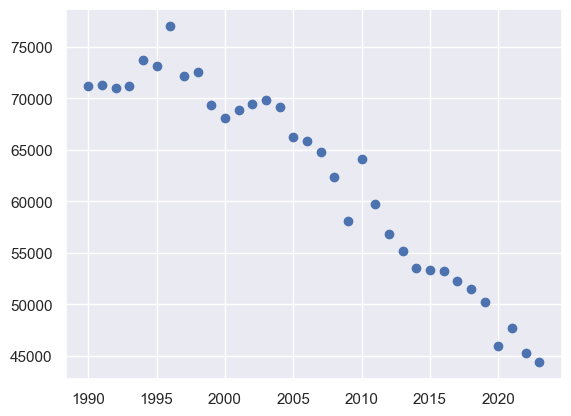

In [87]:
# get x axis, column
col = df.columns
col = col[2:]
x = [int(x) for x in col]
print(x)

# get y axis, first row value
first_row = df.iloc[0].tolist()
first_row = first_row[2:]
y = [float(x) for x in first_row]
print(y)

plt.scatter(x, y)
plt.show()

### Linear regression

Coefficient: [[-929.19854851]]
Intercept: [1926751.29640947]


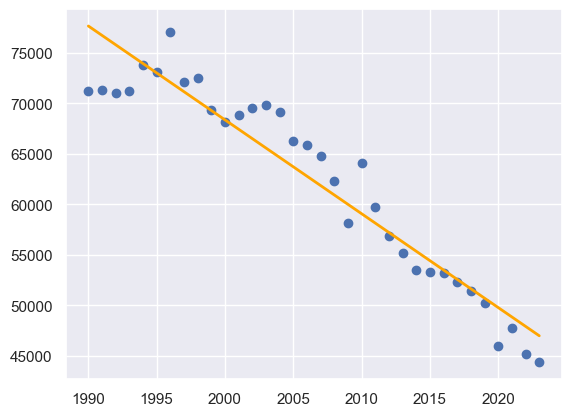

In [88]:
from sklearn.linear_model import LinearRegression

x = np.array(x).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

model = LinearRegression(fit_intercept=True)
model.fit(x, y)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

yfit = model.predict(x)
plt.scatter(x, y)
plt.plot(x, yfit, color='orange', lw=2)
plt.show()

It looks good but the start is a bit off, let's try polynomial regression

### Polynomial regression

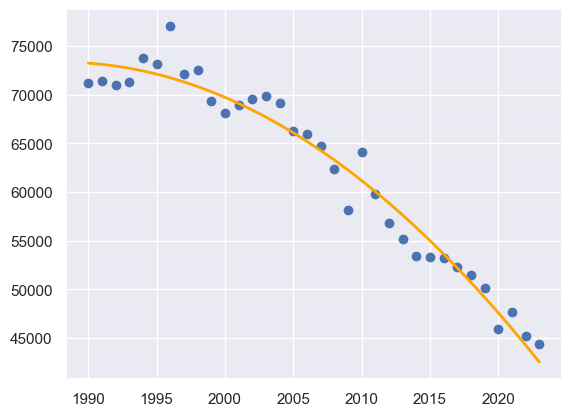

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial 2 cause i don't think more is needed
poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(x, y)

yfit = poly_model.predict(x)

plt.scatter(x, y)
plt.plot(x, yfit, color='orange', lw=2)


## Clustering


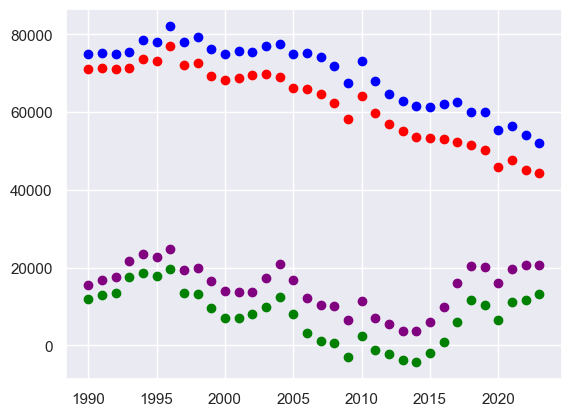

In [90]:
# get more rows, the first 4
# NATIONAL TOTAL (excluding LULUCF, excluding international transports)
# NATIONAL TOTAL (excluding LULUCF, including international transports)
# NATIONAL TOTAL (including LULUCF, excluding international transports)
# NATIONAL TOTAL (including LULUCF, including international transports)

def get_row(i):
    row = df.iloc[i].tolist()
    row = row[2:]                       # remove first 2 col
    convert = [float(x) for x in row]   # convert to float
    return np.array(convert).reshape(-1, 1)

y_0 = get_row(0)
y_1 = get_row(1)
y_2 = get_row(2)
y_3 = get_row(3)

plt.scatter(x, y_0, color='red')
plt.scatter(x, y_1, color='blue')
plt.scatter(x, y_2, color='green')
plt.scatter(x, y_3, color='purple')
plt.show()

#### Can we find back those clusters using k mean or GMM ?

### K Mean

In [91]:
X = []
Y = []
for index, y in enumerate([y_0, y_1, y_2, y_3]):
    X.append(np.column_stack((x, y)))
    Y.extend([index for _ in range(len(y))])

X = np.concatenate(X, axis=0)
Y = np.array(Y)

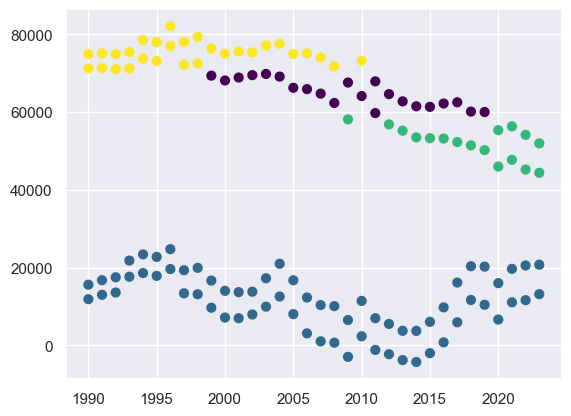

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(4, random_state=1)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

### Gaussian Mixture Model (GMM)

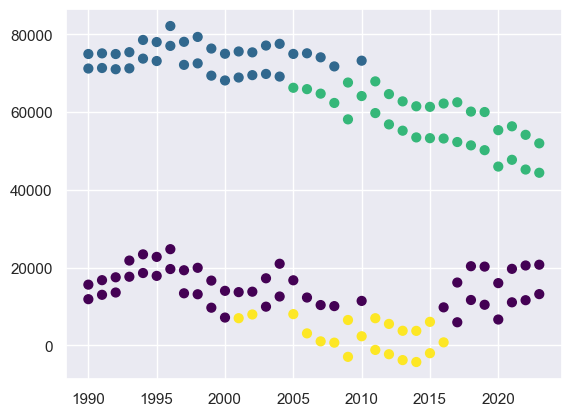

In [68]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=4, random_state=0)
labels = gmm.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

### Run GMM several times

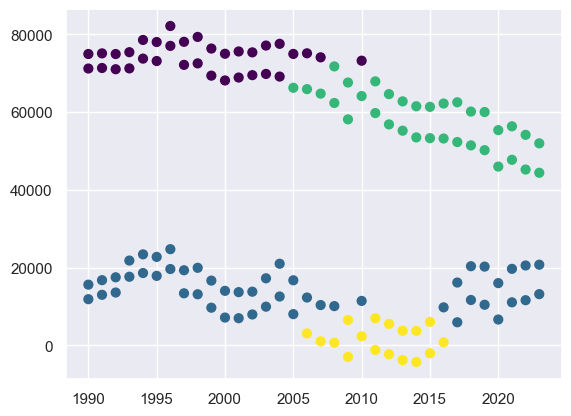

In [69]:
gmm = GMM(n_components=4, n_init=10)
labels = gmm.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

## Decision tree

We saw that we can't really find our category from a cluster, but can a machine learning algorithm find them?

### Split the data into train test split

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8
)

### Create and train the decision tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_pred

array([0, 1, 0, 2, 3, 2, 1, 2, 3, 0, 0, 2, 3, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 3, 0, 2, 0])

### Evaluate the decision tree performance

In [72]:
from sklearn.metrics import f1_score, accuracy_score

print("Absolute error:", (y_test != y_pred).sum())
print("Accuracy:", accuracy_score(y_test, y_pred))

print("F1-scores (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1-scores (weighted):", f1_score(y_test, y_pred, average='weighted'))

Absolute error: 6
Accuracy: 0.7857142857142857
F1-scores (macro): 0.811391223155929
F1-scores (weighted): 0.7887154861944777


### Plot a confusion matrix

Text(110.44999999999997, 0.5, 'predicted label')

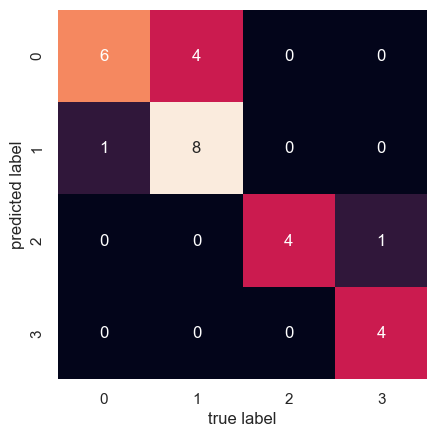

In [73]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

We see that if often makes mistake on class 1 and predict 0. But there is very little test data so it might not be reliable. Nonetheless the accuracy is ok at 0.78.

### Plot the decision tree
#### What does the tree looks like to give this result ?

[Text(0.525, 0.9285714285714286, 'x[1] <= 34557.3\ngini = 0.747\nsamples = 108\nvalue = [27.0, 22.0, 30.0, 29.0]'),
 Text(0.3, 0.7857142857142857, 'x[1] <= 13628.15\ngini = 0.5\nsamples = 59\nvalue = [0, 0, 30, 29]'),
 Text(0.4125, 0.8571428571428572, 'True  '),
 Text(0.1, 0.6428571428571429, 'x[1] <= 3389.85\ngini = 0.382\nsamples = 35\nvalue = [0, 0, 26, 9]'),
 Text(0.05, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.15, 0.5, 'x[0] <= 2005.5\ngini = 0.461\nsamples = 25\nvalue = [0, 0, 16, 9]'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]'),
 Text(0.2, 0.35714285714285715, 'x[0] <= 2015.5\ngini = 0.492\nsamples = 16\nvalue = [0, 0, 7, 9]'),
 Text(0.15, 0.21428571428571427, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7, 0]'),
 Text(0.5, 0.6428571428571429, 'x[0] <= 1996.5\ngini = 0.278\nsamples = 24\nvalue = [0, 0, 4, 20]'),
 Text(0.45, 0.5, 'x[1] <= 207

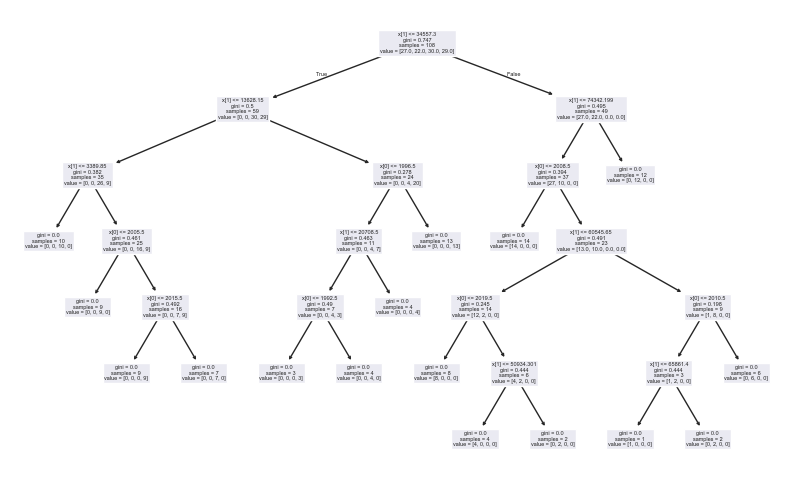

In [74]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(tree)

it's bigger than i thought so why not reduce it and retest it ? maybe it will be better to generalize.

Absolute error: 7
Accuracy: 0.75
F1-scores (macro): 0.8157894736842105
F1-scores (weighted): 0.75


[Text(0.6, 0.9, 'x[1] <= 34557.3\ngini = 0.747\nsamples = 108\nvalue = [27.0, 22.0, 30.0, 29.0]'),
 Text(0.3333333333333333, 0.7, 'x[1] <= 13628.15\ngini = 0.5\nsamples = 59\nvalue = [0, 0, 30, 29]'),
 Text(0.4666666666666667, 0.8, 'True  '),
 Text(0.13333333333333333, 0.5, 'x[1] <= 3389.85\ngini = 0.382\nsamples = 35\nvalue = [0, 0, 26, 9]'),
 Text(0.06666666666666667, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]'),
 Text(0.2, 0.3, 'x[0] <= 2005.5\ngini = 0.461\nsamples = 25\nvalue = [0, 0, 16, 9]'),
 Text(0.13333333333333333, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 9, 0]'),
 Text(0.26666666666666666, 0.1, 'gini = 0.492\nsamples = 16\nvalue = [0, 0, 7, 9]'),
 Text(0.5333333333333333, 0.5, 'x[0] <= 1996.5\ngini = 0.278\nsamples = 24\nvalue = [0, 0, 4, 20]'),
 Text(0.4666666666666667, 0.3, 'x[1] <= 20708.5\ngini = 0.463\nsamples = 11\nvalue = [0, 0, 4, 7]'),
 Text(0.4, 0.1, 'gini = 0.49\nsamples = 7\nvalue = [0, 0, 4, 3]'),
 Text(0.5333333333333333, 0.1, 'gini = 0.0\nsamp

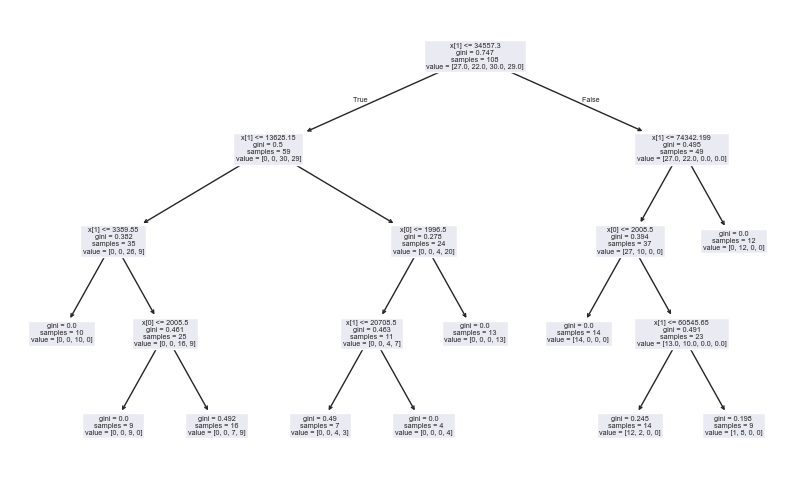

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Change the max depth to 4, we see on the figure above the depth is 6 with no pre-pruning
tree = DecisionTreeClassifier(random_state=0, max_depth=4).fit(X_train, y_train)

y_pred = tree.predict(X_test)
from sklearn.metrics import f1_score, accuracy_score

print("Absolute error:", (y_test != y_pred).sum())
print("Accuracy:", accuracy_score(y_test, y_pred))

print("F1-scores (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1-scores (weighted):", f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(10, 6))
plot_tree(tree)

Nope, reducing the max depth doesn't improve the performance in our case.
Maybe a SVM will have better results ?

## SVM

In [76]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.6785714285714286


It's not better than a decision tree but maybe it was unlucky, let's try again
### Perform 10 fold validation


In [77]:
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear', C=1.0)

scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')

In [78]:
print("Scores for each fold:", scores)
print("Average accuracy:", scores.mean())

Scores for each fold: [0.71428571 0.57142857 0.85714286 0.71428571 0.71428571 0.78571429
 0.76923077 1.         0.61538462 0.53846154]
Average accuracy: 0.7280219780219779


Ok it is still worst than a decision tree but maybe it need better parameters.
### Perform Hyper parameter tuning
not completely tested, stopped after 3 hours

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [1, 10, 100],
#               'kernel': ['linear', 'rbf'],
#               }

# grid = GridSearchCV(SVC(), param_grid, cv=4, n_jobs=8)
# grid.fit(X, Y)
# grid.best_params_

# # Train model with best params
# model = SVC(**grid.best_params_)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))

# Exercice 5 
## Permutation feature importance

### importing again, to be clear 

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

df = pd.read_csv("../Total air emissions by greenhouse gas.csv")

### cleaning data, remplacing NaN per the mean for each columns, for more data

In [80]:

years = [str(year) for year in range(1990, 2024)]
for year in years:
    df[year] = pd.to_numeric(df[year], errors='coerce')

df[years] = df[years].fillna(df[years].mean())

### created a new target : did the consumption grow or not between 2023 and 1990 ? 

In [42]:
df['growth'] = df['2023'] - df['1990']
df['target'] = (df['growth'] > 0).astype(int)  # 1 is true, 0 is false

X = df[years]
y = df['target']

print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")

Shape X: (154, 34)
Shape y: (154,)


### Splitting, creating the model for trying to predict the growth, training, getting the accuracy score and the importance

#### Can we predict the growth and what are the most/least important years ? 

In [43]:

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# Modèle
model = SVC(C=1.0, gamma=0.0001, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Score
print(f"Accuracy : {accuracy_score(y_pred, y_test):.4f}")

# Permutation importance
pi = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=0)
importances = pd.DataFrame({'feature': X.columns, 'importance': pi['importances_mean']})
importances = importances.sort_values(by='importance', ascending=False)
print(importances)

Accuracy : 0.9032
   feature  importance
17    2007    0.059355
26    2016    0.059355
20    2010    0.059355
19    2009    0.059355
16    2006    0.059355
15    2005    0.059355
14    2004    0.059355
13    2003    0.059355
25    2015    0.059355
8     1998    0.059355
7     1997    0.059355
27    2017    0.059355
28    2018    0.059355
29    2019    0.059355
9     1999    0.057419
22    2012    0.057419
18    2008    0.057419
21    2011    0.057419
24    2014    0.056774
23    2013    0.056774
30    2020    0.056774
31    2021    0.056774
33    2023    0.056774
12    2002    0.056774
11    2001    0.056774
10    2000    0.056774
1     1991    0.056129
0     1990    0.056129
3     1993    0.054839
2     1992    0.054839
32    2022    0.054194
6     1996    0.052903
4     1994    0.052903
5     1995    0.049677


### most important features


In [81]:
# Get the most important feature
most_important_feature = importances.iloc[0]
print(f"The most important feature is: {most_important_feature['feature']} with importance: {most_important_feature['importance']}")

The most important feature is: 2007 with importance: 0.059354838709677366


### train with the two most important features
#### Can we reduce the number of feature by using only the most important one ?

In [45]:
# Select the two most important features
top_2_features = importances['feature'].head(2).values
X_train_top_2 = X_train[top_2_features]
X_test_top_2 = X_test[top_2_features]

# Train the model using these two features
model.fit(X_train_top_2, y_train)

# Predict and evaluate accuracy
y_pred_top_2 = model.predict(X_test_top_2)
accuracy_top_2 = accuracy_score(y_pred_top_2, y_test)

print(f"Accuracy with the top 2 features: {accuracy_top_2:.4f}")


Accuracy with the top 2 features: 0.8710


### two less important :
#### Is there a notable difference with the two least important feature ?

In [46]:
# two least important features
bottom_2_features = importances['feature'].tail(2).values
X_train_bottom_2 = X_train[bottom_2_features]
X_test_bottom_2 = X_test[bottom_2_features]

# Train the model using these
model.fit(X_train_bottom_2, y_train)

# Predict and evaluate accuracy
y_pred_bottom_2 = model.predict(X_test_bottom_2)
accuracy_bottom_2 = accuracy_score(y_pred_bottom_2, y_test)

print(f"Accuracy with the bottom 2 features: {accuracy_bottom_2:.4f}")


Accuracy with the bottom 2 features: 0.9032


### as we can see, our top and bottom are not very reflective on the importance of them, as we got a better score for bottom rather than top features. we can ever do a cross validation to check :

In [47]:
from sklearn.model_selection import cross_val_score

X_top_2 = X[top_2_features]
cv_scores_top_2 = cross_val_score(model, X_top_2, y, cv=5)
print(f"Cross-validation scores with top 2 features: {cv_scores_top_2}")
print(f"Mean CV score with top 2 features: {np.mean(cv_scores_top_2):.4f}")

X_bottom_2 = X[bottom_2_features]
cv_scores_bottom_2 = cross_val_score(model, X_bottom_2, y, cv=5)
print(f"Cross-validation scores with bottom 2 features: {cv_scores_bottom_2}")
print(f"Mean CV score with bottom 2 features: {np.mean(cv_scores_bottom_2):.4f}")


Cross-validation scores with top 2 features: [0.77419355 0.87096774 0.74193548 0.77419355 0.76666667]
Mean CV score with top 2 features: 0.7856
Cross-validation scores with bottom 2 features: [0.77419355 0.80645161 0.83870968 0.80645161 0.8       ]
Mean CV score with bottom 2 features: 0.8052


### this might be due to overfitting, or also because the bottom data have at the end better pattern than the top data.

## Statistical testing

### thanks to statistical testing, we can prove, or unprove our result from above, saying that the top and bottom are not really relevant.

### re-doing step 2, for clarity.

In [48]:
import pandas as pd
import numpy as np
import pingouin as pg
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Load and clean dataset
df = pd.read_csv("../Total air emissions by greenhouse gas.csv")
years = [str(year) for year in range(1990, 2024)]
for year in years:
    df[year] = pd.to_numeric(df[year], errors='coerce')
df[years] = df[years].fillna(df[years].mean())

df['growth'] = df['2023'] - df['1990']
df['target'] = (df['growth'] > 0).astype(int)

X = df[years]
y = df['target']

# Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
model = SVC(C=1.0, gamma=0.0001, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Permutation importance
pi = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=0)
importances = pd.DataFrame({'feature': X.columns, 'importance': pi['importances_mean']})
importances = importances.sort_values(by='importance', ascending=False)

# Select features
top_2_features = importances['feature'].head(2).values
bottom_2_features = importances['feature'].tail(2).values

# Re-train models with top 2 and bottom 2 features
model_top2 = SVC(C=1.0, gamma=0.0001, kernel="rbf")
model_bottom2 = SVC(C=1.0, gamma=0.0001, kernel="rbf")

### training again, for bottom2, top2, majority

In [50]:
from sklearn.dummy import DummyClassifier

X_train_top2 = X_train[top_2_features]
X_test_top2 = X_test[top_2_features]
X_train_bottom2 = X_train[bottom_2_features]
X_test_bottom2 = X_test[bottom_2_features]

model_top2.fit(X_train_top2, y_train)
model_bottom2.fit(X_train_bottom2, y_train)

y_pred_top2 = model_top2.predict(X_test_top2)
y_pred_bottom2 = model_bottom2.predict(X_test_bottom2)

model_majority = DummyClassifier(strategy="most_frequent")
model_majority.fit(X_train_top2, y_train)
y_pred_majority = model_majority.predict(X_test_top2)

### building a classifier correctness dataframe

In [51]:

df_eval = pd.DataFrame({
    'top2': y_pred_top2 == y_test.values,
    'bottom2': y_pred_bottom2 == y_test.values,
    'majority': y_pred_majority == y_test.values
})

### performed McNemar test between the top 2 and the bottom 2 

In [83]:

observed1, stats1 = pg.chi2_mcnemar(df_eval, x='bottom2', y='majority')
print("McNemar's test between bottom2 and majority classifier:")
print(stats1, "\n")

observed2, stats2 = pg.chi2_mcnemar(df_eval, x='top2', y='bottom2')
print("McNemar's test between top2 and bottom2 classifier:")
print(stats2)


McNemar's test between bottom2 and majority classifier:
         chi2  dof  p-approx  p-exact
mcnemar   0.5    1    0.4795      0.5 

McNemar's test between top2 and bottom2 classifier:
         chi2  dof  p-approx  p-exact
mcnemar   0.0    1       1.0        1


### Checking normality on original features 

In [53]:
df_sub = df[years]
normality = pg.normality(df_sub)
print("Normality test results:")
print(normality)


Normality test results:
             W          pval  normal
1990  0.387594  1.053857e-22   False
1991  0.388540  1.090894e-22   False
1992  0.385947  9.924882e-23   False
1993  0.387672  1.056878e-22   False
1994  0.395428  1.404327e-22   False
1995  0.396306  1.450533e-22   False
1996  0.403324  1.881043e-22   False
1997  0.400081  1.667698e-22   False
1998  0.402260  1.808081e-22   False
1999  0.402812  1.845596e-22   False
2000  0.404475  1.963414e-22   False
2001  0.411664  2.569723e-22   False
2002  0.418926  3.381213e-22   False
2003  0.422448  3.866282e-22   False
2004  0.422543  3.880280e-22   False
2005  0.428050  4.791384e-22   False
2006  0.436304  6.591734e-22   False
2007  0.445337  9.384573e-22   False
2008  0.450189  1.136661e-21   False
2009  0.450745  1.161957e-21   False
2010  0.465154  2.069287e-21   False
2011  0.459577  1.652751e-21   False
2012  0.461187  1.763265e-21   False
2013  0.463992  1.974354e-21   False
2014  0.466071  2.147628e-21   False
2015  0.468946

### bottom2 vs majority has a p of 0.4795, no real difference

### top2 vs bottom2 has a p of 1, so no difference at all

# Correlation analysis (Pearson, since normality generally ok on large samples)

In [54]:
correlation = pg.pairwise_corr(df_sub, method="pearson")
correlation

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,1990,1991,pearson,two-sided,154,0.999471,"[1.0, 1.0]",4.648840e-228,1.528e+222,1.0
1,1990,1992,pearson,two-sided,154,0.999422,"[1.0, 1.0]",3.746817e-225,2.07e+219,1.0
2,1990,1993,pearson,two-sided,154,0.999120,"[1.0, 1.0]",2.918966e-211,4.049e+205,1.0
3,1990,1994,pearson,two-sided,154,0.998809,"[1.0, 1.0]",2.787115e-201,5.739e+195,1.0
4,1990,1995,pearson,two-sided,154,0.998301,"[1.0, 1.0]",1.462172e-189,1.561e+184,1.0
...,...,...,...,...,...,...,...,...,...,...
556,2020,2022,pearson,two-sided,154,0.999215,"[1.0, 1.0]",5.030184e-215,2.096e+209,1.0
557,2020,2023,pearson,two-sided,154,0.998819,"[1.0, 1.0]",1.483946e-201,1.069e+196,1.0
558,2021,2022,pearson,two-sided,154,0.999838,"[1.0, 1.0]",3.792324e-267,5.728e+260,1.0
559,2021,2023,pearson,two-sided,154,0.999609,"[1.0, 1.0]",4.591967e-238,1.142e+232,1.0


# Dimensionality reduction

### performing pca and converting the pca output into a df with the original data index (optional)

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X : year 1990-2023 which are your features

# converting the PCA output into a df with the original data index (optional)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y  # add target to the DataFrame for color-coding in the plot


### Plot the 2D representation of the PCA-transformed data

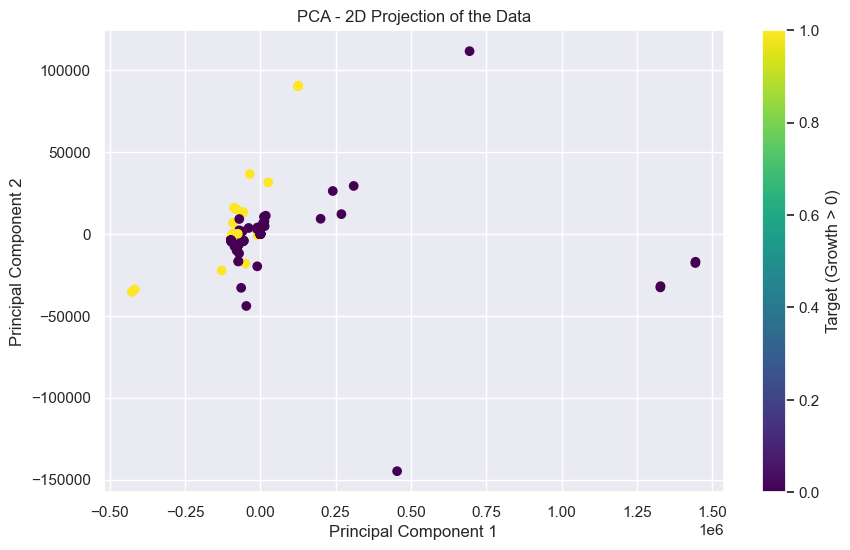

In [56]:

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis')
plt.title('PCA - 2D Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target (Growth > 0)')
plt.show()

We can see outliers, some datapoint with unusual feature value. PC1 is capturing more variance than PC2. But the clusters are not very distincts. And PCA is not really helping

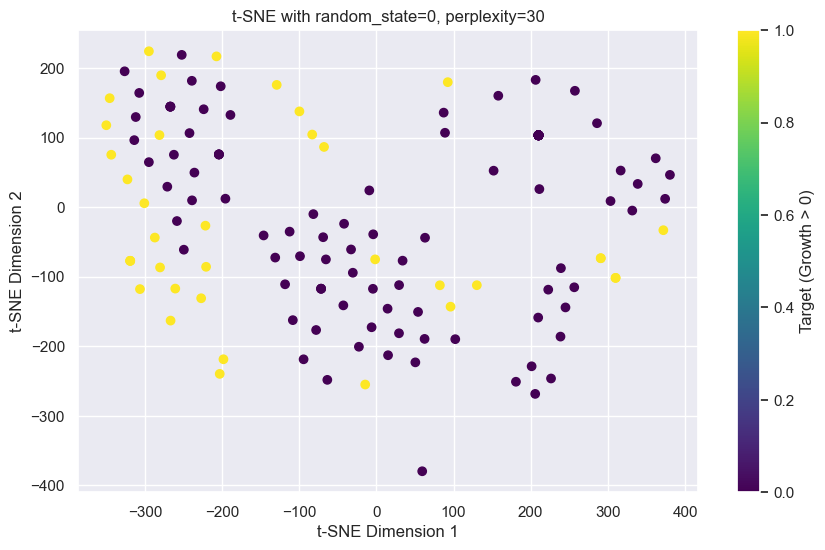

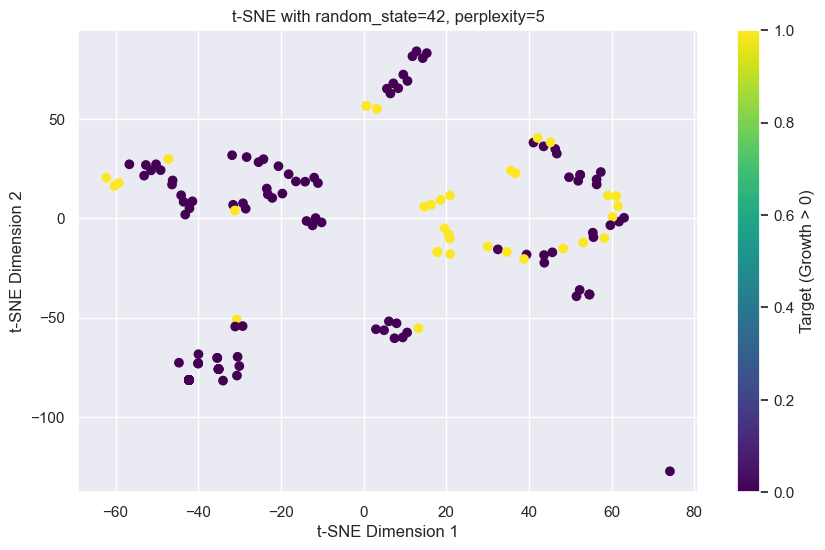

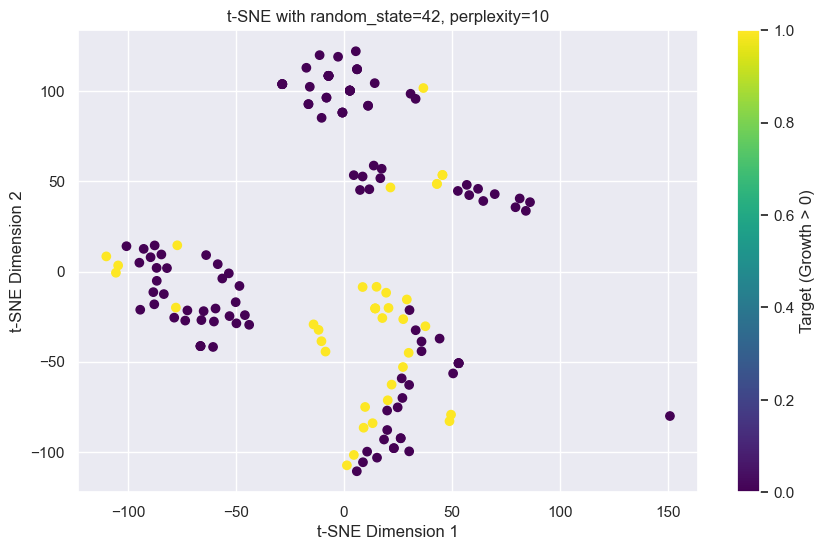

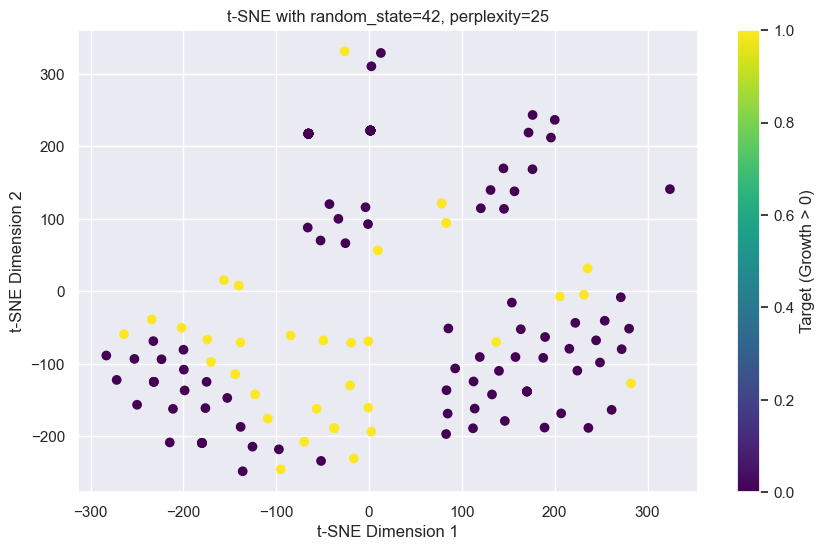

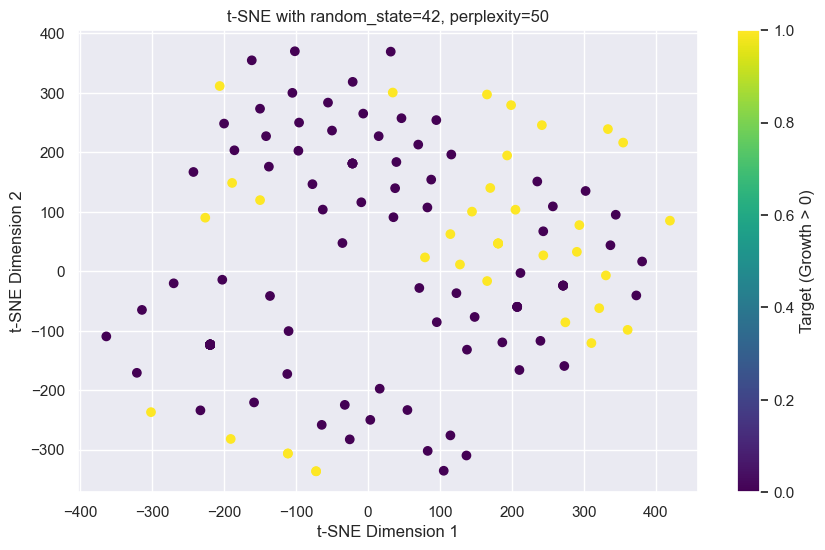

In [57]:
from sklearn.manifold import TSNE

# Function to run t-SNE and plot the results
def run_tsne(X, y, random_state=0, perplexity=30):
    tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)

    tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
    tsne_df['target'] = y

    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['target'], cmap='viridis')
    plt.title(f't-SNE with random_state={random_state}, perplexity={perplexity}')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.colorbar(label='Target (Growth > 0)')
    plt.show()

# Run t-SNE with default parameters
run_tsne(X, y)

# Experiment with different values of perplexity and random_state
for perplexity in [5, 10, 25, 50]:
    run_tsne(X, y, random_state=42, perplexity=perplexity)


### We can see some clustering patterns in these t-SNE plots, which add more to the data than PCA, the two color are more separated.

## SVM

In [19]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))

Accuracy 0.6428571428571429


### Perform 10 fold validation

In [20]:
from sklearn.model_selection import cross_val_score

model = SVC(kernel='linear', C=1.0)

scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')

In [21]:
print("Scores for each fold:", scores)
print("Average accuracy:", scores.mean())

Scores for each fold: [0.71428571 0.57142857 0.85714286 0.71428571 0.71428571 0.78571429
 0.76923077 1.         0.61538462 0.53846154]
Average accuracy: 0.7280219780219779


### Perform hyper parameter tuning

In [22]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [1, 10, 100],
#               'kernel': ['linear', 'rbf'],
#               }

# grid = GridSearchCV(SVC(), param_grid, cv=4, n_jobs=8) # n jobs because it's still running after 3 hours
# grid.fit(X, Y)
# grid.best_params_

KeyboardInterrupt: 

### Try the SVM with the best hyperparam

In [ ]:
# model = SVC(**grid.best_params_)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))